In [98]:
import pandas as pd 

# LOADING DATASET AND PRINTING COLUMNS 

In [100]:
import pandas as pd

# Assuming your DataFrame is named price_data
price_data = pd.read_csv("SP500_close_price_no_missing.csv")
column_names = price_data.columns
print(column_names)


Index(['date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES', 'AET', 'AFL',
       ...
       'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'YHOO', 'YUM', 'ZMH',
       'ZION'],
      dtype='object', length=472)


In [5]:
for column in column_names:
    print(column)


date
MMM
ACE
ABT
ANF
ADBE
AMD
AES
AET
AFL
A
APD
ARG
AKS
AKAM
AA
ATI
AGN
ALL
ALTR
MO
AMZN
AEE
AEP
AXP
AIG
AMT
AMP
ABC
AMGN
APH
APC
ADI
AON
APA
AIV
APOL
AAPL
AMAT
ADM
AIZ
T
ADSK
ADP
AN
AZO
AVB
AVY
AVP
BHI
BLL
BAC
BK
BCR
BAX
BBT
BDX
BBBY
BMS
BRK.B
BBY
BIG
BIIB
BLK
HRB
BMC
BA
BXP
BSX
BMY
BRCM
BF.B
CHRW
CA
CVC
COG
CAM
CPB
COF
CAH
CFN
KMX
CCL
CAT
CBG
CBS
CELG
CNP
CTL
CERN
CF
SCHW
CHK
CVX
CB
CI
CINF
CTAS
CSCO
C
CTXS
CLF
CLX
CME
CMS
COH
KO
CCE
CTSH
CL
CMCSA
CMA
CSC
CPWR
CAG
COP
CNX
ED
STZ
GLW
COST
CVH
COV
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DF
DE
DNR
XRAY
DVN
DV
DO
DTV
DFS
DISCA
D
RRD
DOV
DOW
DPS
DTE
DD
DUK
DNB
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EMC
EMR
ETR
EOG
EQT
EFX
EQR
EL
EXC
EXPE
EXPD
ESRX
XOM
FFIV
FDO
FAST
FII
FDX
FIS
FITB
FHN
FSLR
FE
FISV
FLIR
FLS
FLR
FMC
FTI
F
BEN
FCX
FTR
GME
GCI
GPS
GD
GE
GIS
GPC
GNW
GILD
GS
GT
GWW
HAL
HOG
HAR
HRS
HIG
HAS
HCP
HCN
HP
HES
HPQ
HD
HON
HRL
HSP
HST
HCBK
HUM
HBAN
ITW
TEG
INTC
ICE
IBM
IFF
IGT
IP
IPG
INTU
ISRG
IVZ
IRM
JBL
JEC
JNS
JDSU
JNJ
JCI
JOY
JPM
JNPR
K
KEY
KMB
KIM
KLAC

In [7]:
#printing the count of the columns

column_count = len(price_data.columns)
print(f"The DataFrame has {column_count} columns.")


The DataFrame has 472 columns.


# PROBLEM 1.A

           MMM       ACE       ABT       ANF      ADBE       AMD       AES  \
1    -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806  0.004773   
2     0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837  0.013402   
3    -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001  0.017081   
4     0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982  0.000000   
5     0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961 -0.001541   
...        ...       ...       ...       ...       ...       ...       ...   
1038  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1039 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000  0.029256   
1040  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766  0.010493   
1041 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342 -0.024658   
1042 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095 -0.017993   

           AET       AFL         A  ...       WYN      WYNN    

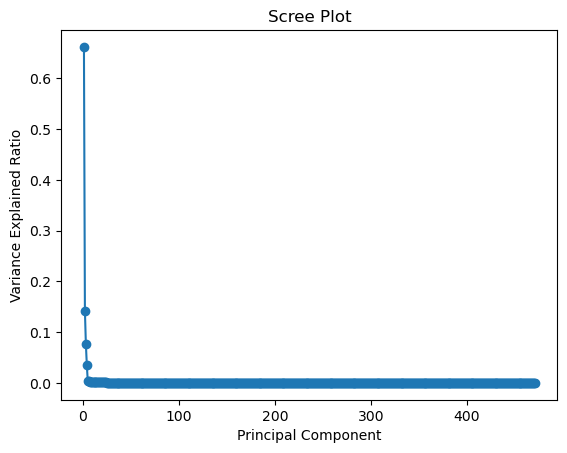

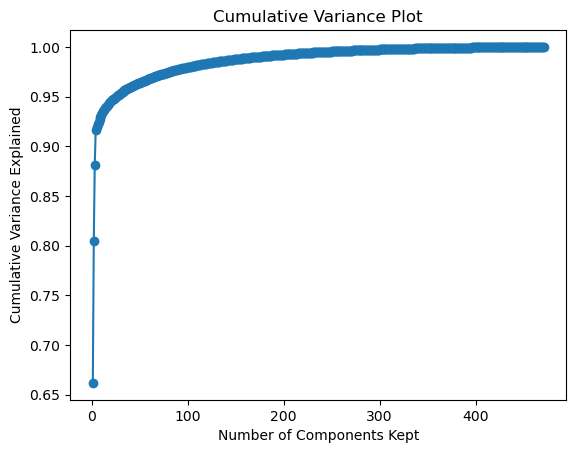

Number of components needed for 80% variance: 2


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv")  # Update this with your actual dataset path

# Derive log returns
log_returns = df.drop('date', axis=1).pct_change().apply(lambda x: np.log(1 + x))

# Drop the first row with NaN values resulting from pct_change()
log_returns = log_returns.dropna()

print(log_returns)

# Fit a PCA model to log returns without specifying the number of components
pca = PCA()
principal_components = pca.fit_transform(log_returns)

# Plot a scree plot
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.show()

# Create a cumulative variance plot
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Determine the number of components for 80% variance
total_variance = sum(explained_variance)
cumulative_variance_percentage = cumulative_variance / total_variance * 100
n_components_80 = np.argmax(cumulative_variance_percentage >= 80) + 1

print(f"Number of components needed for 80% variance: {n_components_80}")




# PROBLEM 1.B

Question 1.B.1



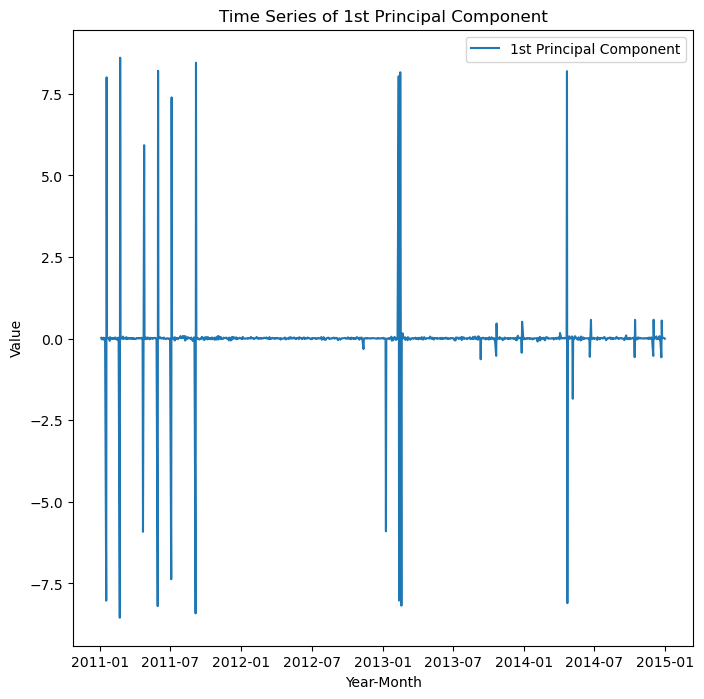

Date with the lowest value for the 1st principal component: 2011-02-21 00:00:00

Question 1.B.2

The Weights from PCA Model for 1st Principal Component are
[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 -2.84996292e-04
 -5.72619142e-04  4.83386817e-05 -3.91390757e-04 -4.58434408e-04
 -6.23355389e-04 -9.66790406e-04 -1.90161299e-04 -1.46205151e-04
 -1.15296428e-03 -1.72594136e-04 -4.68930601e-04 -6.97485914e-04
  8.32226145e-04 -2.84771634e-04 -3.45667066e-04  2.36078671e-04
  5.68257965e-06 -6.03865332e-04  1.88067208e-04 -3.60323058e-04
 -8.37719988e-04 -1.43300062e-04 -5.86539013e-04  7.48145146e-05
  4.97410488e-04 -9.91840678e-05 -2.94322931e-04 -6.50148287e-05
 -1.48893275e-04 -7.82702002e-04  3.27133183e-04  1.33951228e-03
  3.81881715e-04 -5.37882867e-04 -1.64863697e-04 -1.07117661e-03
  5.46174428e-05  1.24382506e-04 -1.18797408e-04 -2.47941669e-04
 -2.03052052e-04  2.29708495e-04 -9.27833882e-05 -1.63851552e-03
 -5.88828380e-04 -1.88967778e-04 -7.00902935e-04 -6.55419524e-04

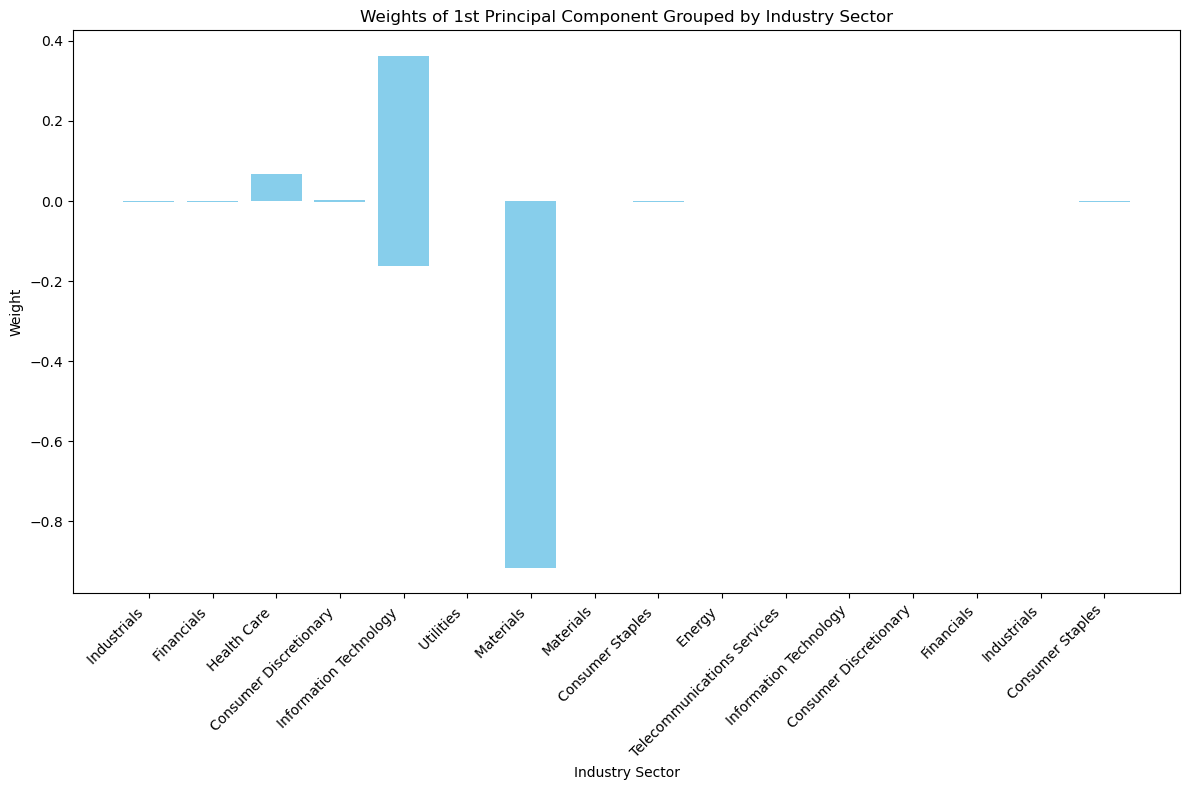

Question 1.B.4



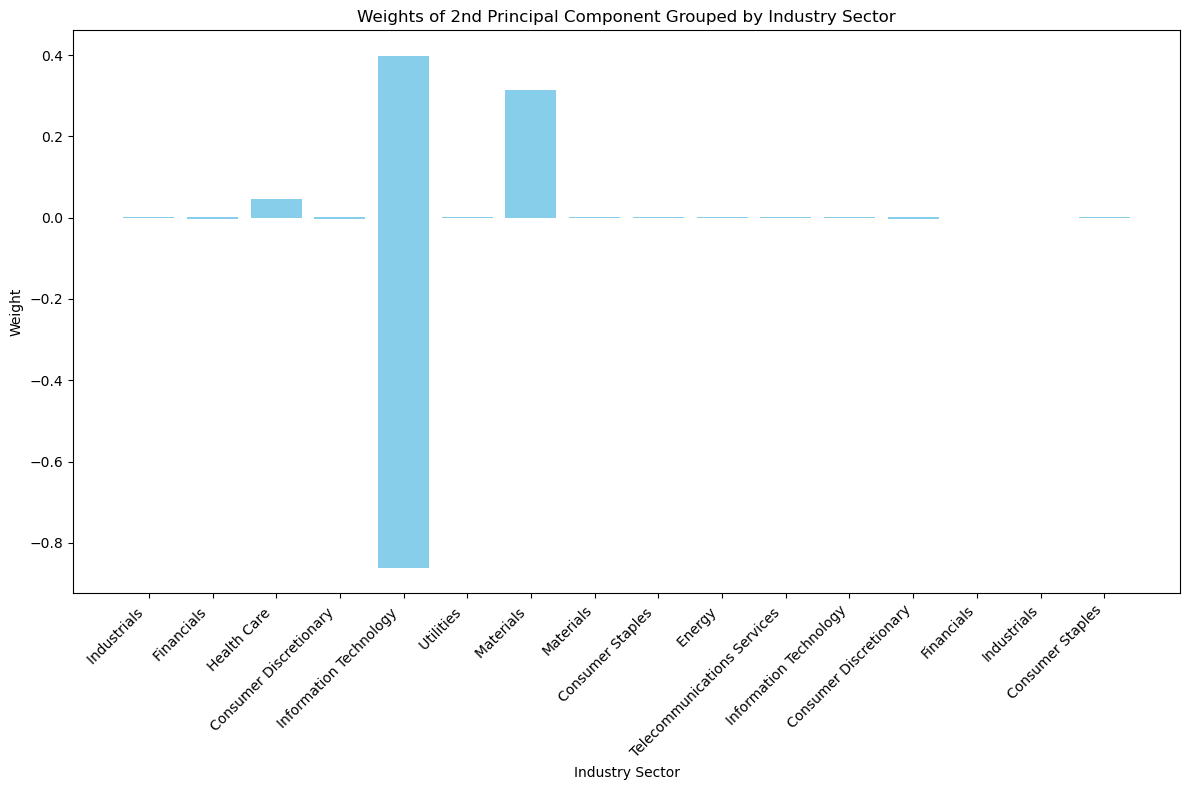

Question 1.B.5

Explained Variance Ratio - 1st Principal Component: 0.6618857343808933
Explained Variance Ratio - 2nd Principal Component: 0.14236870090659523


In [109]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the datasets 
df_close_price = pd.read_csv("SP500_close_price_no_missing.csv")  # Update this with your actual dataset path
df_ticker = pd.read_csv("SP500_ticker.csv", encoding = 'ISO-8859-1')


# Derive log returns
log_returns = df_close_price.drop('date', axis=1).pct_change().apply(lambda x: np.log(1 + x))

# Drop the first row with NaN values resulting from pct_change()
log_returns = log_returns.dropna()

# Fit a PCA model to log returns without specifying the number of components
pca = PCA()
principal_components = pca.fit_transform(log_returns)

# Convert 'date' column to datetime format
df_close_price['date'] = pd.to_datetime(df_close_price['date'])

print("Question 1.B.1\n")

# Plot time series of the 1st principal component with year and month
plt.figure(figsize=(8, 8))
plt.plot(df_close_price['date'][1:], principal_components[:, 0], label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_index_1st_pc = np.argmin(principal_components[:, 0])
date_min_1st_pc = df_close_price['date'][min_index_1st_pc + 1]
print(f"Date with the lowest value for the 1st principal component: {date_min_1st_pc}\n")

# Extract weights from the PCA model for 1st and 2nd principal components
weights_1st_pc = pca.components_[0]
weights_2nd_pc = pca.components_[1]

print("Question 1.B.2\n")

print("The Weights from PCA Model for 1st Principal Component are")
print(weights_1st_pc)
print("\n")

print("The Weights from PCA Model for 2nd Principal Component are")
print(weights_2nd_pc)
print("\n")

# Create a plot to show weights of the 1st principal component grouped by industry sector
# Merge the ticker information with the weights
df_weights_1st_pc = pd.DataFrame({'Ticker': df_close_price.columns[1:], 'Weight': weights_1st_pc})
df_weights_1st_pc = pd.merge(df_weights_1st_pc, df_ticker, left_on='Ticker', right_on='ticker')

print("Question 1.B.3\n")

plt.figure(figsize=(12, 8))
plt.bar(df_weights_1st_pc['sector'], df_weights_1st_pc['Weight'], color='skyblue')
plt.title('Weights of 1st Principal Component Grouped by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a similar plot for the 2nd principal component
# Merge the ticker information with the weights
df_weights_2nd_pc = pd.DataFrame({'Ticker': df_close_price.columns[1:], 'Weight': weights_2nd_pc})
df_weights_2nd_pc = pd.merge(df_weights_2nd_pc, df_ticker, left_on='Ticker', right_on='ticker')

print("Question 1.B.4\n")

plt.figure(figsize=(12, 8))
plt.bar(df_weights_2nd_pc['sector'], df_weights_2nd_pc['Weight'], color='skyblue')
plt.title('Weights of 2nd Principal Component Grouped by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Question 1.B.5\n")

# Choose which principal component to use for constructing a new stock index
# Consider the explained variance ratio to make an informed decision
explained_variance_ratio_1st_pc = pca.explained_variance_ratio_[0]
explained_variance_ratio_2nd_pc = pca.explained_variance_ratio_[1]

print(f"Explained Variance Ratio - 1st Principal Component: {explained_variance_ratio_1st_pc}")
print(f"Explained Variance Ratio - 2nd Principal Component: {explained_variance_ratio_2nd_pc}")


# Problem 2 Analysis of principal components and weights

# WRAPPER METHOD 

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("BMI.csv")

# Separate features (X) and target variable (y)
X = df.drop("fatpctg", axis=1)
y = df["fatpctg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement backward stepwise regression
def backward_selection(X, y, threshold):
    features = list(X.columns)
    selected_features = features.copy()
    
    while len(selected_features) > 0:
        X_train = X[selected_features]
        model = LinearRegression()
        model.fit(X_train, y)
        
        y_pred = model.predict(X_train)
        mse = mean_squared_error(y, y_pred)
        
        # Calculate the adjusted R-squared
        n = len(y)
        k = len(selected_features)
        r_squared = model.score(X_train, y)
        adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))
        
        # Remove the least significant feature
        p_values = feature_p_values(X_train, y)
        min_p_value = p_values.min()
        if min_p_value > threshold:
            break
        
        min_p_value_index = p_values.idxmin()
        selected_features.remove(min_p_value_index)
        
        print(f"Features: {selected_features}, Adjusted R-squared: {adjusted_r_squared:.4f}, MSE: {mse:.4f}")

# Function to calculate p-values for features
def feature_p_values(X, y):
    import statsmodels.api as sm
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues.iloc[1:]  # Exclude the constant term
    return p_values

# Set a significance threshold for feature removal
significance_threshold = 0.05

# Perform backward stepwise regression
backward_selection(X_train, y_train, significance_threshold)


Features: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.7382, MSE: 17.9336
Features: ['Weight', 'Height', 'Neck', 'Chest', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.6084, MSE: 26.9700
Features: ['Weight', 'Height', 'Neck', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.5388, MSE: 31.9338
Features: ['Weight', 'Height', 'Neck', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.4269, MSE: 39.8895
Features: ['Height', 'Neck', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.4069, MSE: 41.5025
Features: ['Height', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.3279, MSE: 47.2762
Features: ['Height', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], Adjusted R-squared: 0.3026, MSE: 49.3124
Features: ['Height', 'Ankle', 'Biceps', 'Forearm',

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("BMI.csv")

# Separate features (X) and target variable (y)
X = df.drop("fatpctg", axis=1)
y = df["fatpctg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement forward stepwise regression
def forward_selection(X, y, threshold):
    features = list(X.columns)
    selected_features = []
    
    while len(features) > 0:
        best_feature = None
        best_mse = float('inf')
        
        for feature in features:
            X_train_temp = X[selected_features + [feature]]
            model = LinearRegression()
            model.fit(X_train_temp, y)
            
            y_pred = model.predict(X_train_temp)
            mse = mean_squared_error(y, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            features.remove(best_feature)
            
            X_train_temp = X[selected_features]
            model = LinearRegression()
            model.fit(X_train_temp, y)
            
            # Calculate the adjusted R-squared
            n = len(y)
            k = len(selected_features)
            r_squared = model.score(X_train_temp, y)
            adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))
            
            print(f"Features: {selected_features}, Adjusted R-squared: {adjusted_r_squared:.4f}, MSE: {best_mse:.4f}")

# Set a significance threshold for feature addition
significance_threshold = 0.05

# Perform forward stepwise regression
forward_selection(X_train, y_train, significance_threshold)


Features: ['Abdomen'], Adjusted R-squared: 0.6765, MSE: 23.5825
Features: ['Abdomen', 'Wrist'], Adjusted R-squared: 0.7202, MSE: 20.2964
Features: ['Abdomen', 'Wrist', 'Weight'], Adjusted R-squared: 0.7324, MSE: 19.3100
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps'], Adjusted R-squared: 0.7363, MSE: 18.9379
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age'], Adjusted R-squared: 0.7387, MSE: 18.6676
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck'], Adjusted R-squared: 0.7410, MSE: 18.4051
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height'], Adjusted R-squared: 0.7417, MSE: 18.2621
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm'], Adjusted R-squared: 0.7418, MSE: 18.1644
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh'], Adjusted R-squared: 0.7416, MSE: 18.0788
Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh'

# FILTER METHOD

    Feature  Correlation with Target
0   fatpctg                 1.000000
1   Abdomen                 0.813432
2     Chest                 0.702620
3       Hip                 0.625201
4    Weight                 0.612925
5     Thigh                 0.559608
6      Knee                 0.508665
7    Biceps                 0.493271
8      Neck                 0.490592
9   Forearm                 0.361387
10    Wrist                 0.346575
11      Age                 0.291458
12    Ankle                 0.265970
13   Height                 0.133211


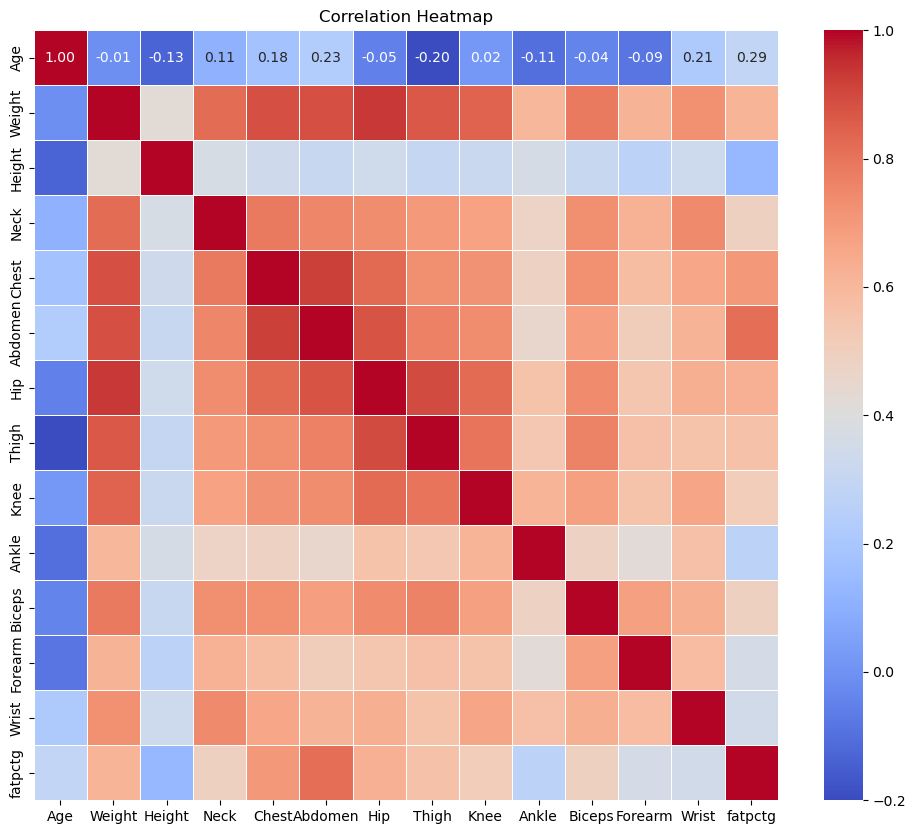

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BMI.csv")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort features based on correlation with the target variable
correlation_with_target = correlation_matrix["fatpctg"].abs().sort_values(ascending=False)

# Display the ranking
feature_ranking = pd.DataFrame({"Feature": correlation_with_target.index, "Correlation with Target": correlation_with_target.values})
print(feature_ranking)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


# LASSO REGRESSION

    Feature  Coefficient
0       Age     0.064426
1    Weight    -0.058331
2    Height    -0.066845
3      Neck    -0.422322
4     Chest    -0.078316
5   Abdomen     0.980187
6       Hip    -0.127771
7     Thigh     0.160673
8      Knee     0.004095
9     Ankle     0.134259
10   Biceps     0.314264
11  Forearm     0.232864
12    Wrist    -2.109029


/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


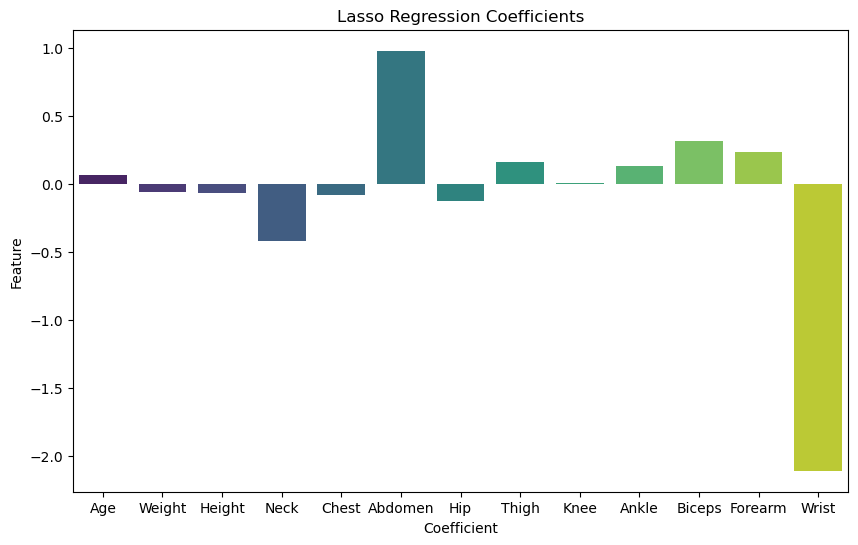

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("BMI.csv")

# Separate features (X) and target variable (y)
X = df.drop("fatpctg", axis=1)
y = df["fatpctg"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Extract feature coefficients
lasso_coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso_model.coef_})

# Display feature coefficients
print(lasso_coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Coefficient", data=lasso_coefficients, palette="viridis")
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()


# RANDOM FOREST (FEATURE IMPORTANCE RANKING)

    Feature  Importance
5   Abdomen    0.731133
2    Height    0.029608
1    Weight    0.029277
12    Wrist    0.026064
8      Knee    0.023962
3      Neck    0.023246
6       Hip    0.022526
0       Age    0.022081
7     Thigh    0.020621
4     Chest    0.020474
9     Ankle    0.019816
10   Biceps    0.017122
11  Forearm    0.014070


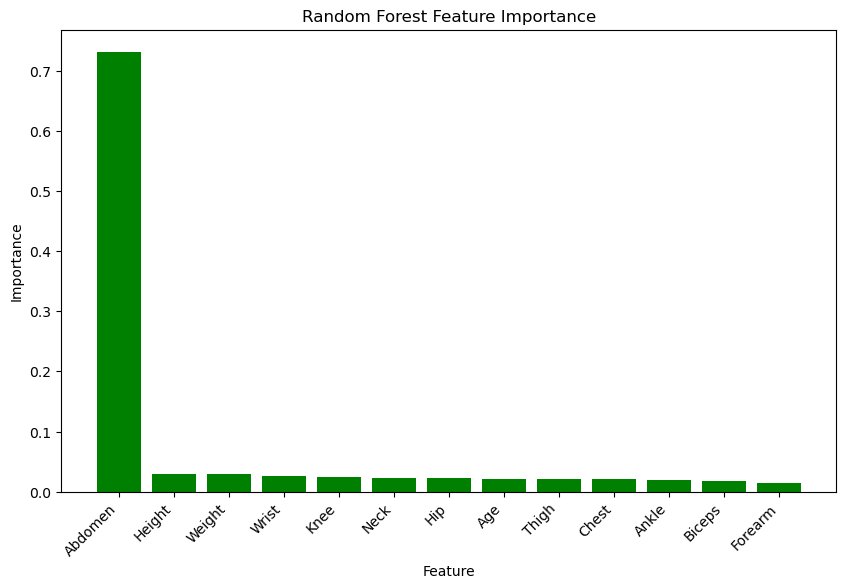

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv("BMI.csv")

# Separate features (X) and target variable (y)
X = df.drop("fatpctg", axis=1)
y = df["fatpctg"]

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance in tabular form
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
